# Notebook imports and packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # cololr map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as msel

import pandas as pd

%matplotlib inline

# Examples

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make data

x_1 = np.linspace(start=-3, stop=3, num=500)


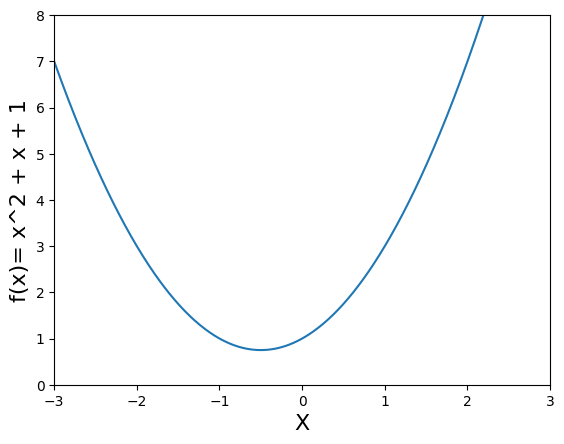

In [4]:
# Plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)= x^2 + x + 1', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

### Chalenge: Create a python function for the derivative of $f(x)$ called $df(x)$

In [5]:
def df(x):
    """
    Derivácia funkcie f(x)= x^2 + x + 1
    """
    return 2*x + 1

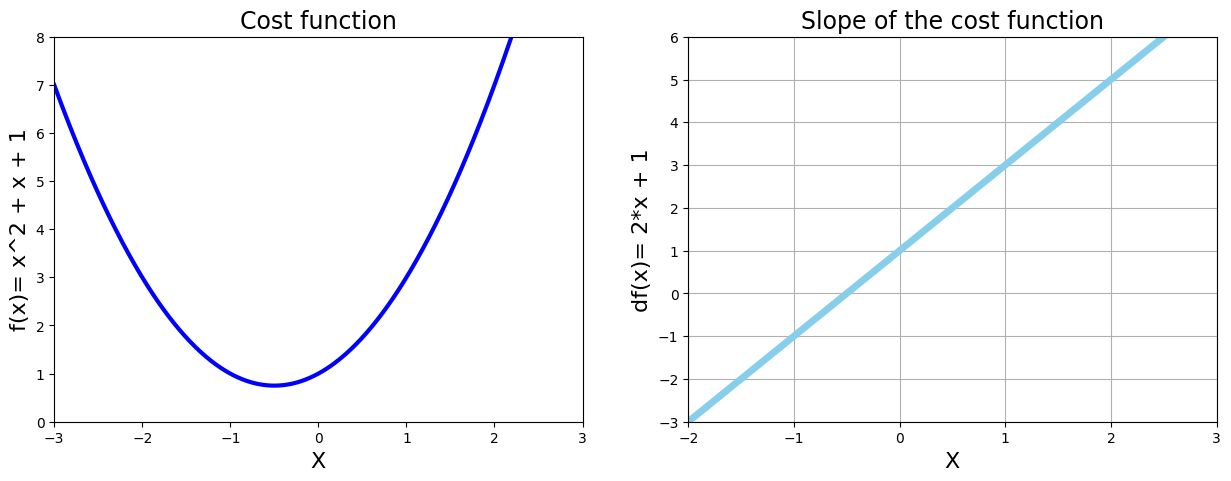

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)= x^2 + x + 1', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)= 2*x + 1', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

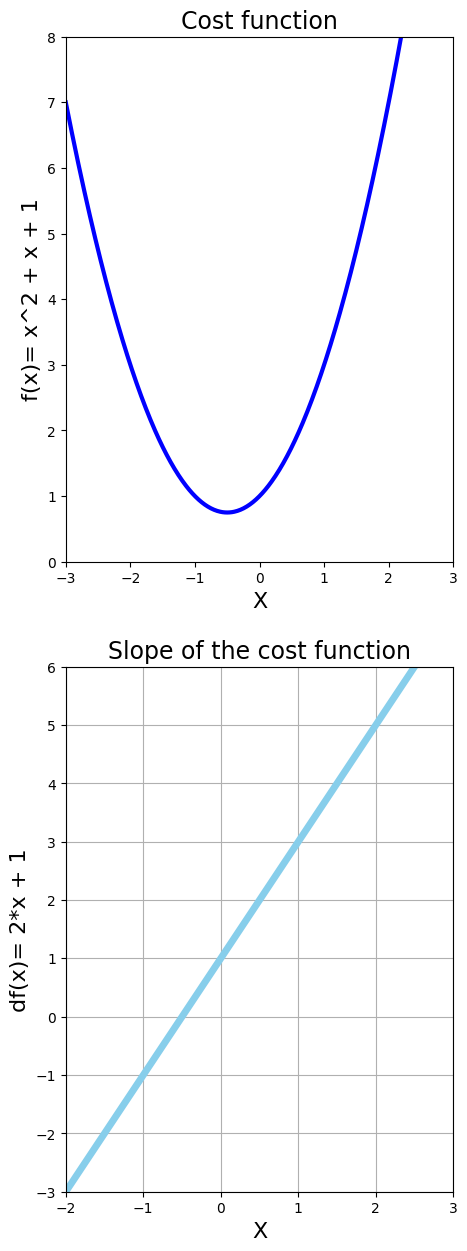

In [7]:
# Plot function and derivative from top to bottom

plt.figure(figsize=[5,15])

# 1 Chart: Cost function
plt.subplot(2,1,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)= x^2 + x + 1', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(2,1,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)= 2*x + 1', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops & Gradient Descent

In [8]:
# Python For loop

for counter in range(5):
    print('Hello world', counter)
print ('End of loop')



Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [9]:
# Python while loop
counter = 0
while counter < 7:
    print('Hello world', counter)
    counter +=1
print ('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
Hello world 5
Hello world 6
End of loop


In [10]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplayer = 0.1

for n in range(30):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplayer * gradient

print('Local minimum occurs at : ', new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))

Local minimum occurs at :  -0.4956672098625011
Slope or df(x) value at this point is :  0.008665580274997753
f(x) value or cost at this point is :  0.7500187730703756


In [11]:
# Čo sa stane keď zvýšime počet iterácií na 500 :

new_x = 3
previous_x = 0
step_multiplayer = 0.1

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplayer * gradient

print('Local minimum occurs at : ', new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))

Local minimum occurs at :  -0.4999999999999999
Slope or df(x) value at this point is :  2.220446049250313e-16
f(x) value or cost at this point is :  0.75


In [12]:
# Poďme to spraviť tak, že budeme testovať presnosť:

new_x = 3
previous_x = 0
step_multiplayer = 0.1
precision = 0.0001

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplayer * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    if step_size<precision:
        print('Loop run this many times : ', n, 'Step size is : ', step_size)
        break

print('Local minimum occurs at : ', new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))

Loop run this many times :  40 Step size is :  9.304595970494045e-05
Local minimum occurs at :  -0.49962781616118024
Slope or df(x) value at this point is :  0.0007443676776395236
f(x) value or cost at this point is :  0.7500001385208099


In [13]:
# Poďme to dať do grafov :

new_x = 3
previous_x = 0
step_multiplayer = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplayer * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size<precision:
        print('Loop run this many times : ', n, 'Step size is : ', step_size)
        break

print('Local minimum occurs at : ', new_x)
print('Slope or df(x) value at this point is : ', df(new_x))
print('f(x) value or cost at this point is : ', f(new_x))

Loop run this many times :  40 Step size is :  9.304595970494045e-05
Local minimum occurs at :  -0.49962781616118024
Slope or df(x) value at this point is :  0.0007443676776395236
f(x) value or cost at this point is :  0.7500001385208099


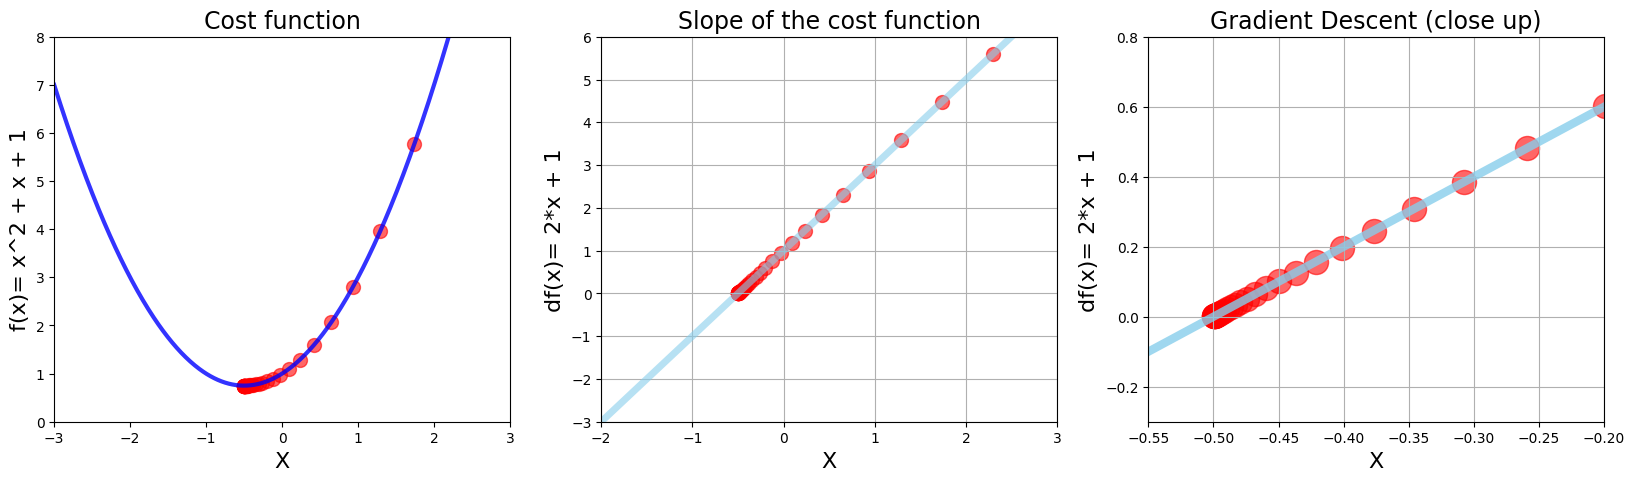

In [14]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20,5])

# 1 Chart: Cost function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)= x^2 + x + 1', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,3,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)= 2*x + 1', fontsize=16)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)


# 3 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)= 2*x + 1', fontsize=16)
plt.grid()
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)

plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [15]:
# Make some data (linspace = lineárna funkcia)
x_2 = np.linspace(-2,2,1000)

# Challenge: Write the g(x) function and  dg(x) function in python

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x



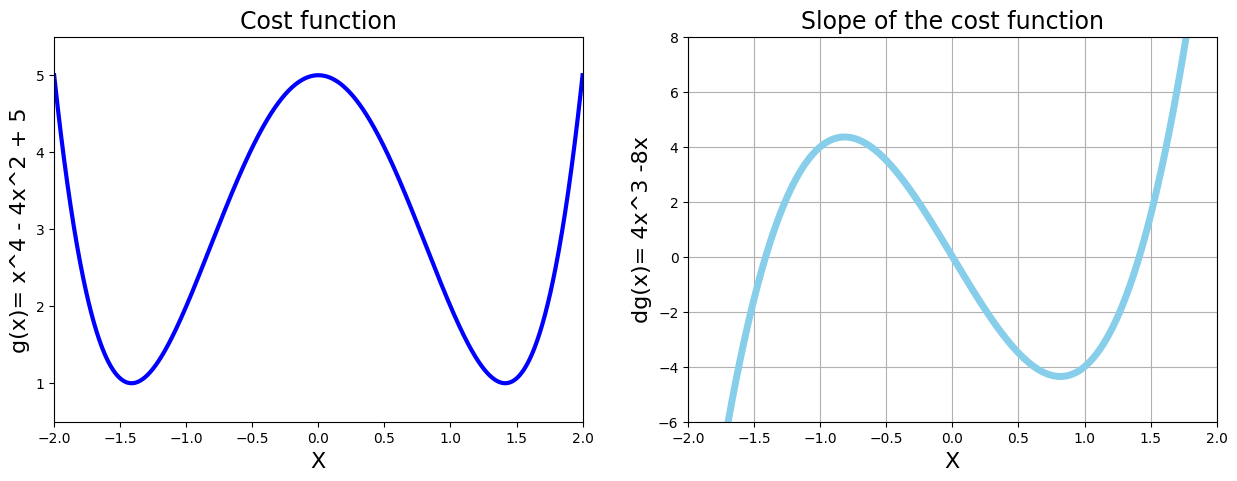

In [16]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 -8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python function

In [17]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    # Function are objects, takže sú uložené niekde v pameti a to znamená
    # takže je možné ju vložiť ako parameter inej funkcie
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        # print("n :", n, ", previous_x:", previous_x, ", new_x:", new_x, ", gradient:", gradient)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size<precision:
            break
    return new_x, x_list, slope_list

In [18]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5, 0.02, 0.001)
print('Local min occurs at: ', local_min)
print('Number of steps to determine local minimum is: ', len(list_x))

Local min occurs at:  -1.4122375085019094
Number of steps to determine local minimum is:  23


In [19]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.02, precision=0.001)
print('Local min occurs at: ', local_min)
print('Number of steps to determine local minimum is: ', len(list_x))

Local min occurs at:  -1.4122375085019094
Number of steps to determine local minimum is:  23


In [20]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occurs at: ', local_min)
print('Number of steps to determine local minimum is: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps to determine local minimum is:  34


In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps to determine local minimum is: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps to determine local minimum is:  56


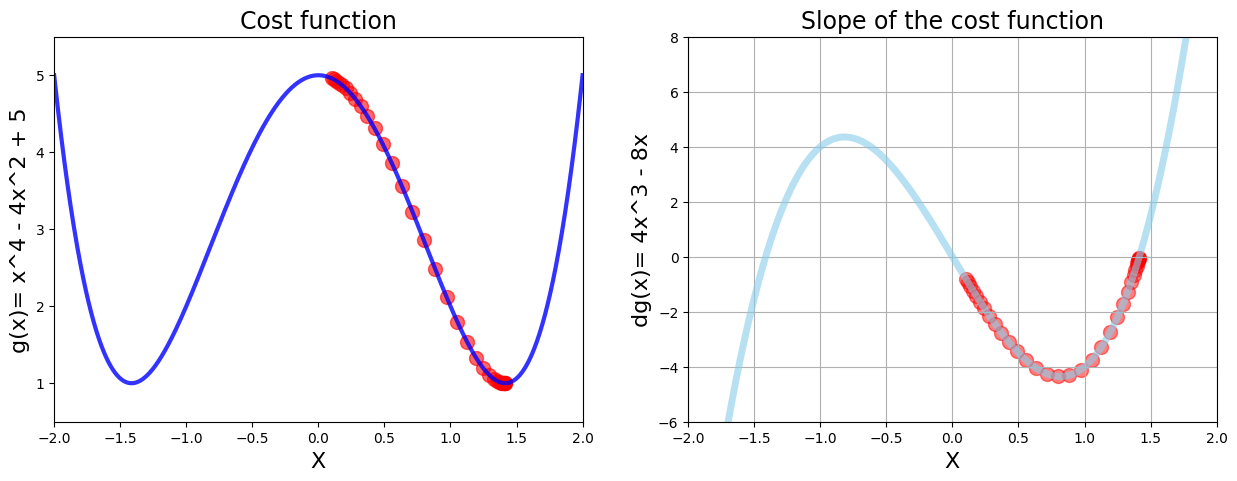

In [22]:
# Calling gradient descent function 

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 - 8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

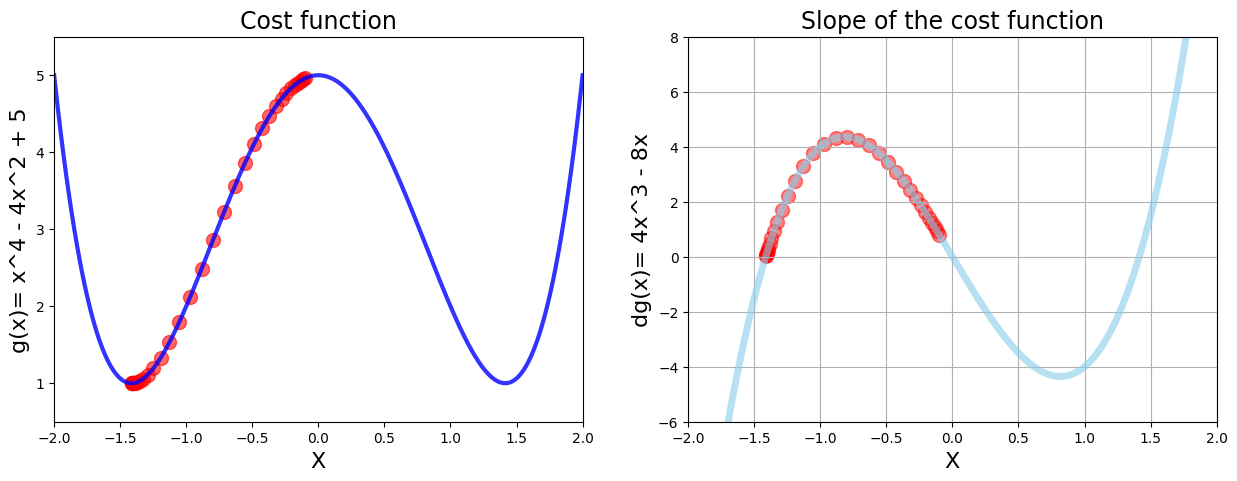

In [23]:
# Calling gradient descent function 

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 - 8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Budeme sa hrat s parametrami

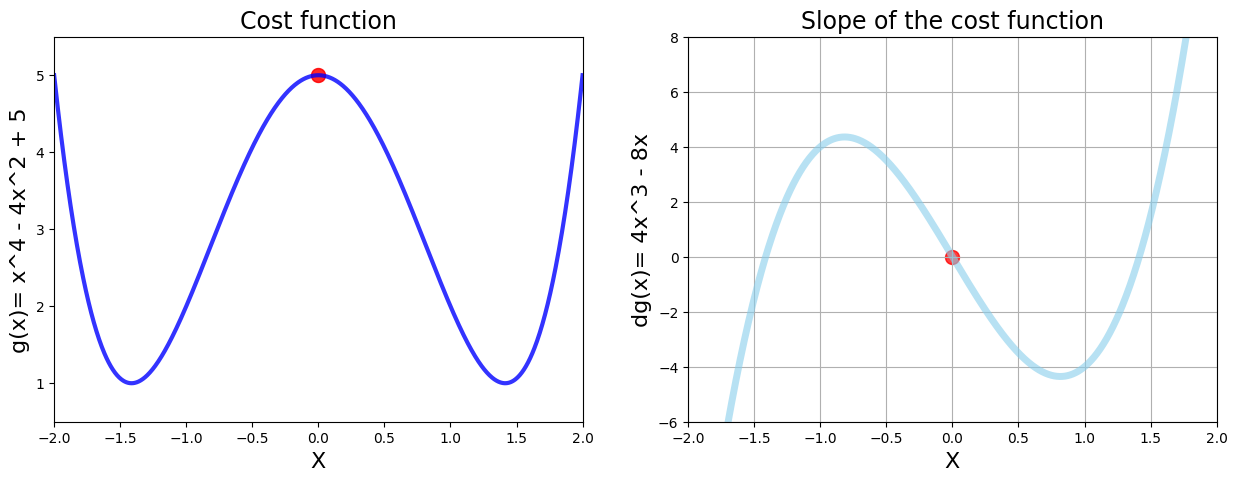

In [24]:
# Calling gradient descent function 

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 - 8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x)=x^5 - 2x^4 + 2$$

In [25]:
# Make data

x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2


def dh(x):
    return 5*x**4 - 8*x**3

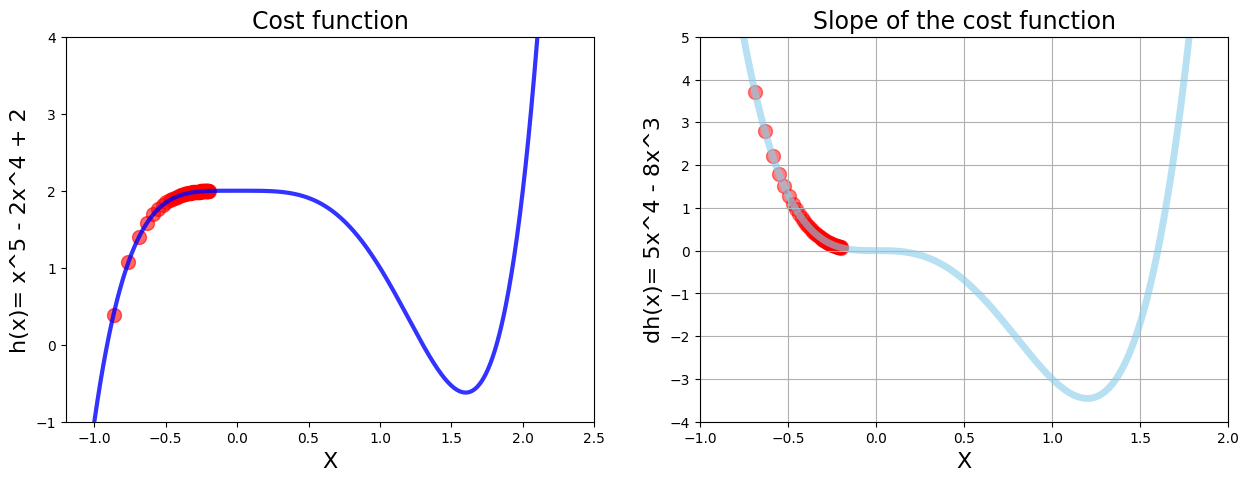

Local min occurs at :  -1.8398461123332792e+24
Cost at this local min is :  -2.1081790694225687e+121
Number of steps to determine local minimum is:  72


In [26]:
# Calling gradient descent function 

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)= x^5 - 2x^4 + 2', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)= 5x^4 - 8x^3', fontsize=16)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-4,5])

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


print('Local min occurs at : ', local_min)
print('Cost at this local min is : ', h(local_min))
print('Number of steps to determine local minimum is: ', len(list_x))

In [27]:
# help(sys)
# sys.version
# type(h(local_min))

# max float :
sys.float_info.max

# Z uvedeného vyplýva, že ak dáme 73 iterácii presiahneme max. číslo float v PC -> exception

1.7976931348623157e+308

## Python Tuples

In [28]:
# Creating a tuple - tuple packing
breakfast = 'beacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17


# How to access a value in a tuple
print ('I love ', breakfast[0])
print ('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')


not_my_address = 1, 'Infinite loop', 'Cupertino', 95014

# tuples are immutable - this (change / add) throw error
#breakfast[0] = 'sausage'
#breakfast[3] = 'sausage'

tuple_with_single_value = 42,

print (type(tuple_with_single_value))
print ('My hotel has no ' + str(tuple_with_single_value[0]) + 'th floor')

# Unpacking tuple
main, side, greens = breakfast
print('Main course is : ', main)

# Packing tuple and its unpacking is princip of returning more values from function

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)

print('Local min occurs at : ', data_tuple[0])
print('Cost at this local min is : ', h(data_tuple[0]))
print('Number of steps to determine local minimum is: ', len(data_tuple[1]))

I love  beacon
My hotel has no 4th floor
<class 'tuple'>
My hotel has no 42th floor
Main course is :  beacon
Local min occurs at :  1.5989534547394717
Cost at this local min is :  -0.6214287992331258
Number of steps to determine local minimum is:  117


# The Learning Rate

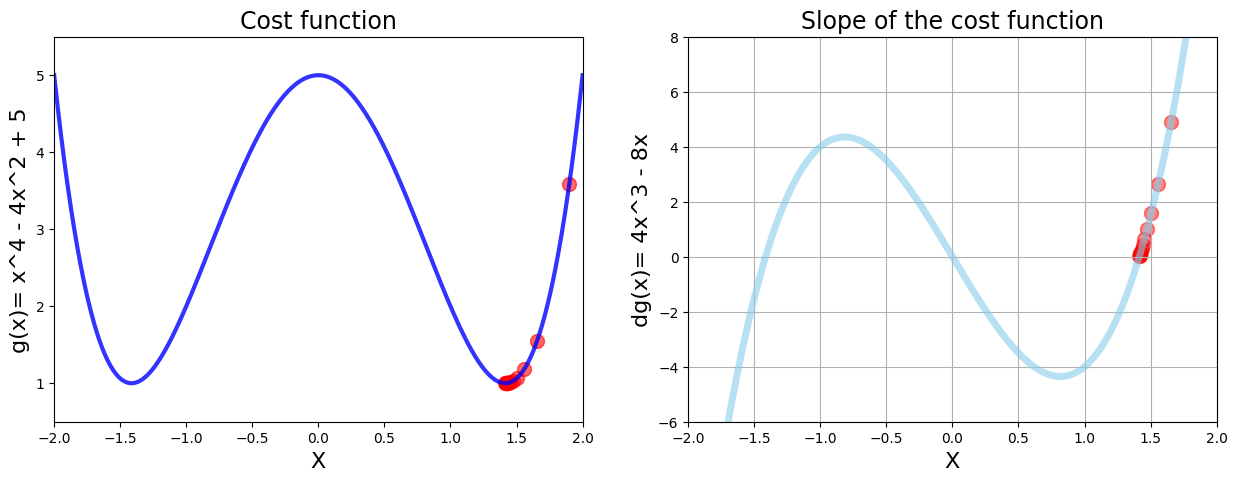

Number of steps to determine local minimum is:  14
Local min occurs at :  1.415879815113846
Cost at this local min is :  -0.34751175621515884


In [29]:
# Calling gradient descent function 

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 - 8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


print('Number of steps to determine local minimum is: ', len(list_x))

print('Local min occurs at : ', local_min)
print('Cost at this local min is : ', h(local_min))


In [30]:
def while_gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001):
    # Function are objects, takže sú uložené niekde v pameti a to znamená
    # takže je možné ju vložiť ako parameter inej funkcie
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    step_size = precision+1

    while step_size > precision:
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

    return new_x, x_list, slope_list

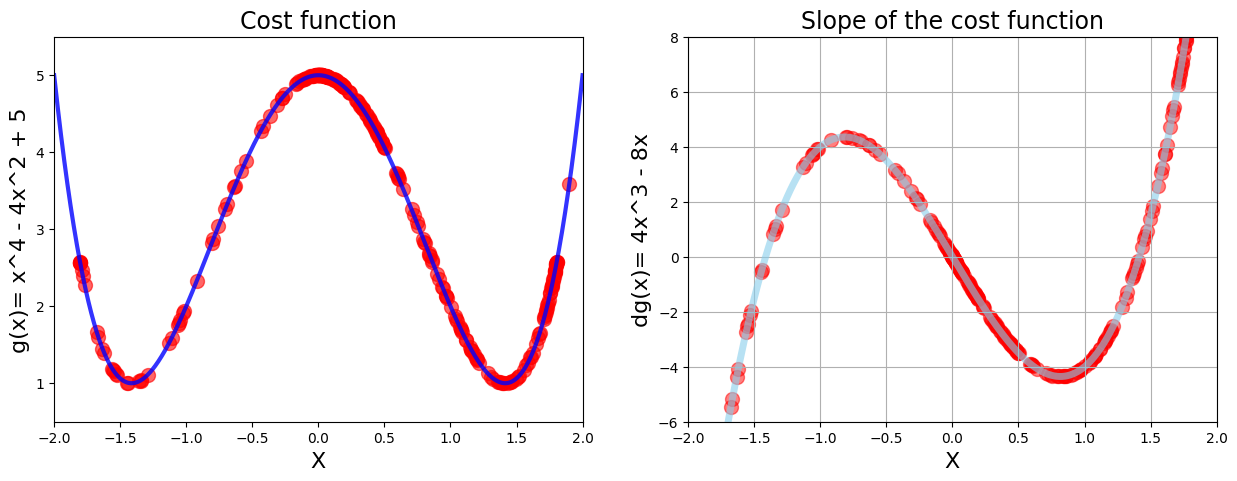

Number of steps to determine local minimum is:  254
Local min occurs at :  -0.00043034196875636597
Cost at this local min is :  1.9999999999999314


In [31]:
# Calling gradient descent function 

local_min, list_x, deriv_list = while_gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.2)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5])

# 1 Chart: Cost function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)= x^4 - 4x^2 + 5', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)


# 2 Chart: Derivative
plt.subplot(1,2,2)
plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)= 4x^3 - 8x', fontsize=16)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


print('Number of steps to determine local minimum is: ', len(list_x))

print('Local min occurs at : ', local_min)
print('Cost at this local min is : ', h(local_min))

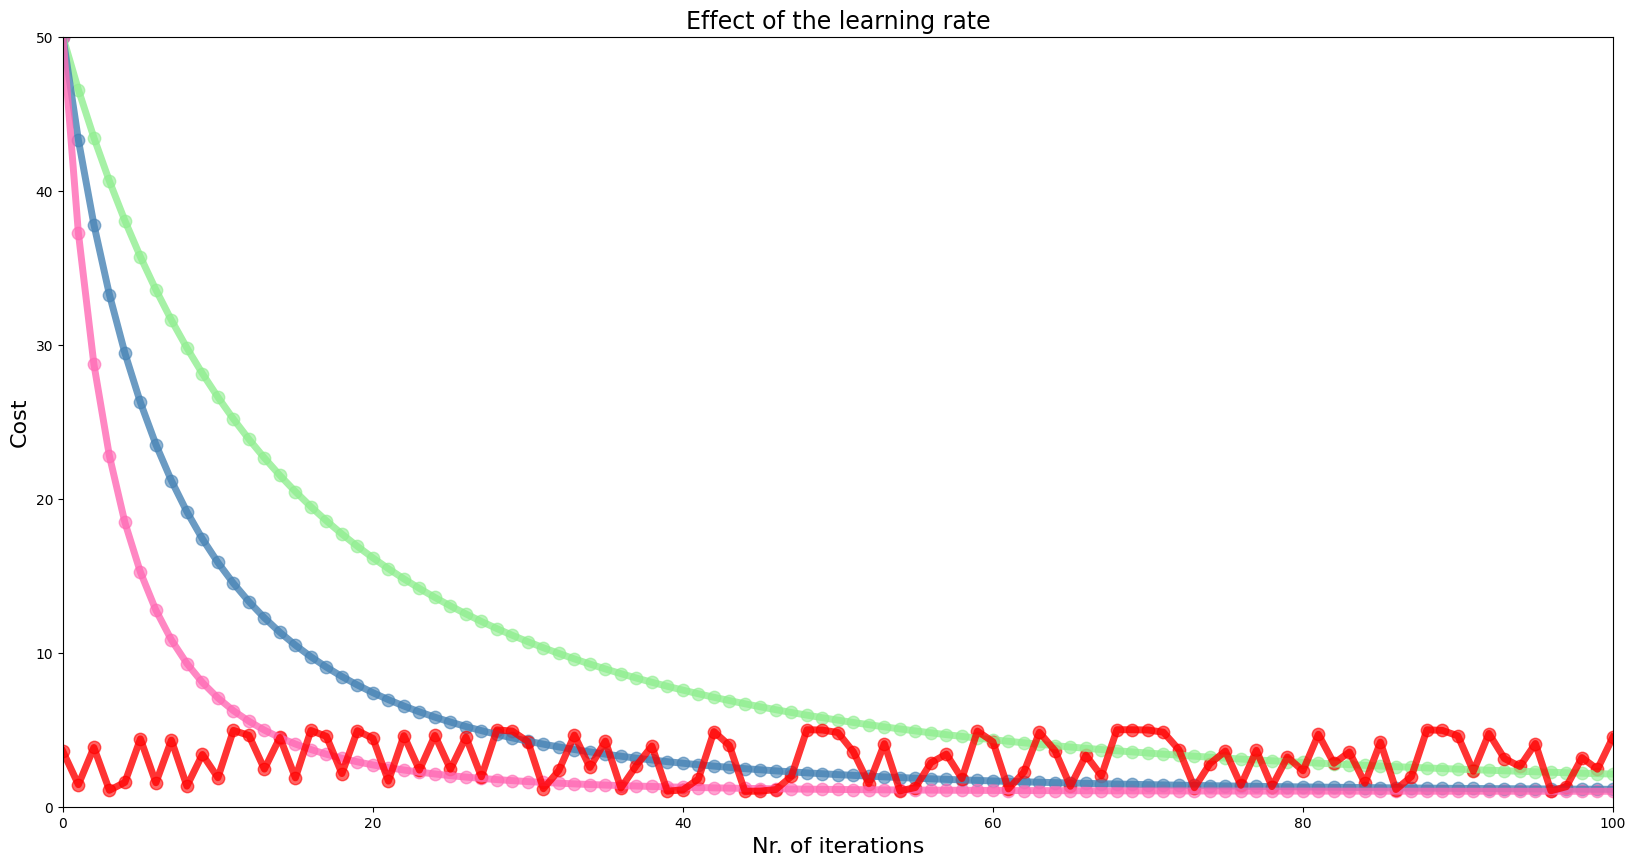

In [32]:
# Run gradient descent 3 times calling gradient descent function 
# Gama often means learning rate
n = 100

low_gama = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gama = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)

high_gama = gradient_descent(derivative_func=dg, initial_guess=3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gama = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration

plt.figure(figsize=[20,10])

plt.xlim([0,n])
plt.ylim([0,50])
plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr. of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for charts
# 1) Y axis Data: convert the list to numpy arrays
low_values = np.array(low_gama[1])
mid_values = np.array(mid_gama[1])
high_values = np.array(high_gama[1])
insane_values = np.array(insane_gama[1])

# 1) X axis Data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))



# Plotting low rating rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80, alpha=0.6)

# Plotting Mid rating rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80, alpha=0.6)

# Plotting High rating rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80, alpha=0.6)

# Plotting Insane rating rate
plt.plot(iteration_list, g(insane_values), color='red', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(insane_values), color='red', s=80, alpha=0.6)

plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} +1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [33]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [34]:
# Make x and y data
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

print ('Shape of X array: ', x_4.shape)
# print(x_4)
print ('Shape of Y array: ', y_4.shape)

# 3d plot vyžaduje aby x_4 a y_4 boli 2dim polia
x_4, y_4 = np.meshgrid(x_4, y_4)
print ('Shape of X array afetr meshgrid: ', x_4.shape)
# x_4
print ('Shape of Y array afetr meshgrid: ', y_4.shape)

Shape of X array:  (200,)
Shape of Y array:  (200,)
Shape of X array afetr meshgrid:  (200, 200)
Shape of Y array afetr meshgrid:  (200, 200)


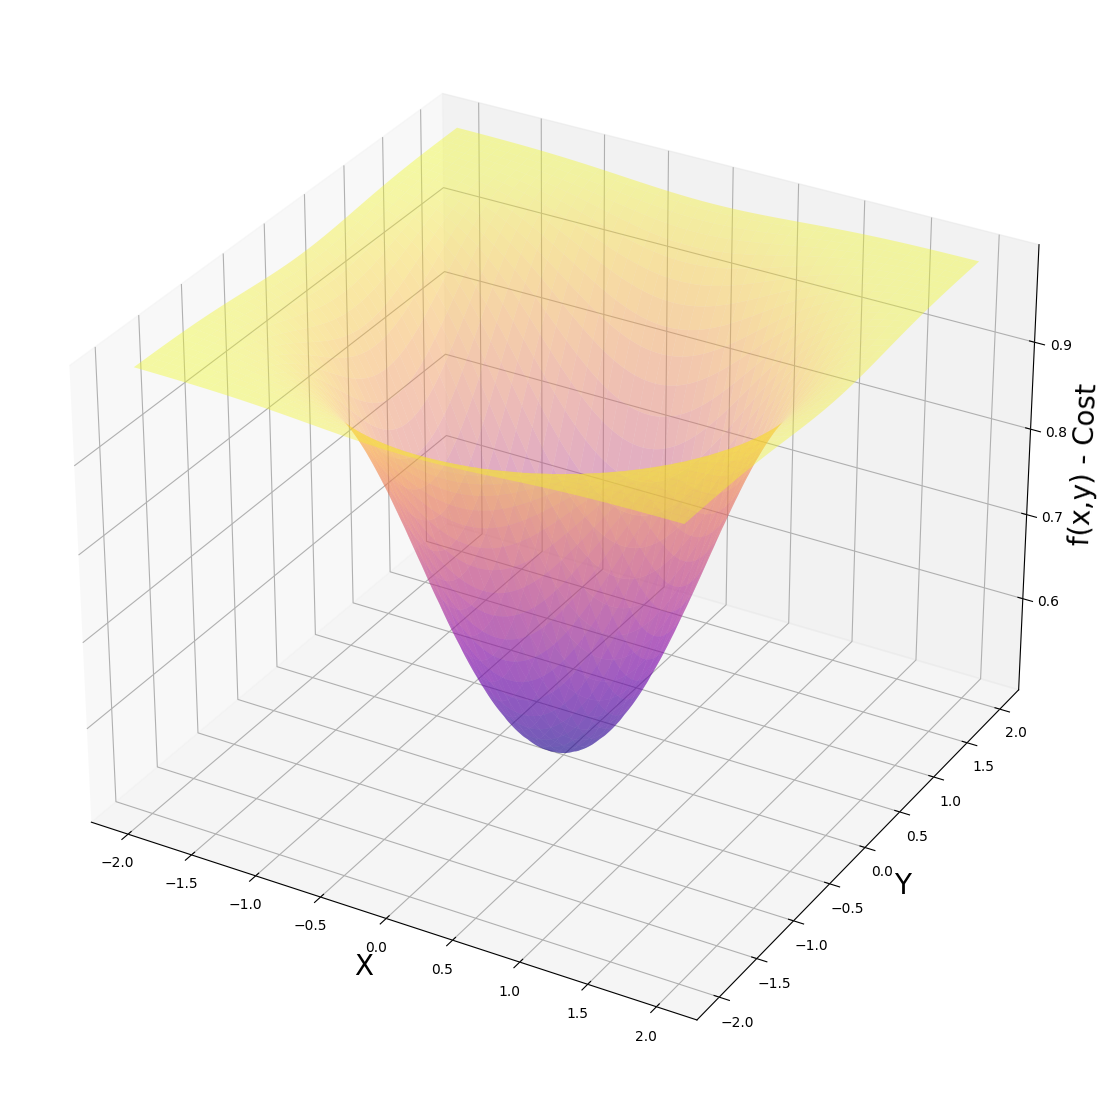

In [35]:
# Generating 3D plot

fig = plt.figure(figsize=[16,14])
# fig je kontajner object ktorý obsahuje všetky údaje o grafe
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)


ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma, alpha=0.4)
plt.show()


## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [36]:
a, b = symbols('x, y')
print('Our Cost function f(x,y) is: ', f(a,b))

print('Partial derivative wrt x is: ' , diff(f(a,b), a))
print('Partial derivative wrt y is: ' , diff(f(a,b), b))

# Ak chceme vypočítať hodnotu f(x,y) v nejakom bode x,y tak použijeme evalf:
f(a,b).evalf(subs={a:1.8, b:1.0})               # Python Dictionary {}
print('Value of f(x,y) at x = 1.8 y = 1.0 is: ', f(a,b).evalf(subs={a:1.8, b:1.0}) )

# Ak chceme vypočítať hodnotu derivácie f(x,y) v nejakom bode x,y tak použijeme evalf:
print('Value of df(x,y)/dx at x = 1.8 y = 1.0 is: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}) )



Our Cost function f(x,y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial derivative wrt y is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x = 1.8 y = 1.0 is:  0.990604794032582
Value of df(x,y)/dx at x = 1.8 y = 1.0 is:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [37]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])     # initial guess of x and y

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    
    # Updating parameters
    params = params- multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('Cost at those values : ', f(params[0],params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of :  3.45838599885832e-11
Minimum occurs at y value of :  1.92132555492129e-11
Cost at those values :  0.500000000000000


In [38]:
# PArtial derivative functions example 4

def fpx(x,y):
    return 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

def fpy(x,y):
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [39]:
fpx(1.8,1.0)

0.036808971619750504

In [40]:
# Toto ide oveľa rýchlejšie....
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])     # initial guess of x and y

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    # Updating parameters
    params = params- multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('Cost at those values : ', f(params[0],params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
Cost at those values :  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [41]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])     # initial guess of x and y
# Toto zmení pole na 2 dim. V každom riadku bude 1 hoidnota x a jedna y. Každá v inom stlpci
values_array = params.reshape(1,2)      
print(values_array.shape)


for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    # Updating parameters
    params = params- multiplier * gradients
    
    # values_array = np.append(values_array, params.reshape(1,2), 0)
    # alternative
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('Cost at those values : ', f(params[0],params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of :  3.458385998858304e-11
Minimum occurs at y value of :  1.9213255549212797e-11
Cost at those values :  0.5


In [62]:
# Advanced NumPy Practice

kirk = np.array([['Captain', 'Guitar']])
print (kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print (hs_band.shape)


print('hs_band[0]', hs_band[0])
print('hs_band[0][1]', hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print('the_roots: ')
print(the_roots)

# Ak by sme chceli pridať po y osi, nepôjde to bez zmeny dimenzie pridávaného poľa. Arr = 2*2 a values = 1*2
# A chceme aby to bolo values = 2*1
the_roots1 = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)
print('The kirk: ')
print(kirk)
print('The kirk reshaped: ')
print(kirk.reshape(2,1))
print('the_roots1 po zmene dimenzii kirk: ')
print(the_roots1)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band The roles', the_roots[:, 1])


(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[0][1] MC
the_roots: 
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
The kirk: 
[['Captain' 'Guitar']]
The kirk reshaped: 
[['Captain']
 ['Guitar']]
the_roots1 po zmene dimenzii kirk: 
[['Black Thought' 'MC' 'Captain']
 ['Questlove' 'Drums' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band The roles ['MC' 'Drums' 'Guitar' 'MC']


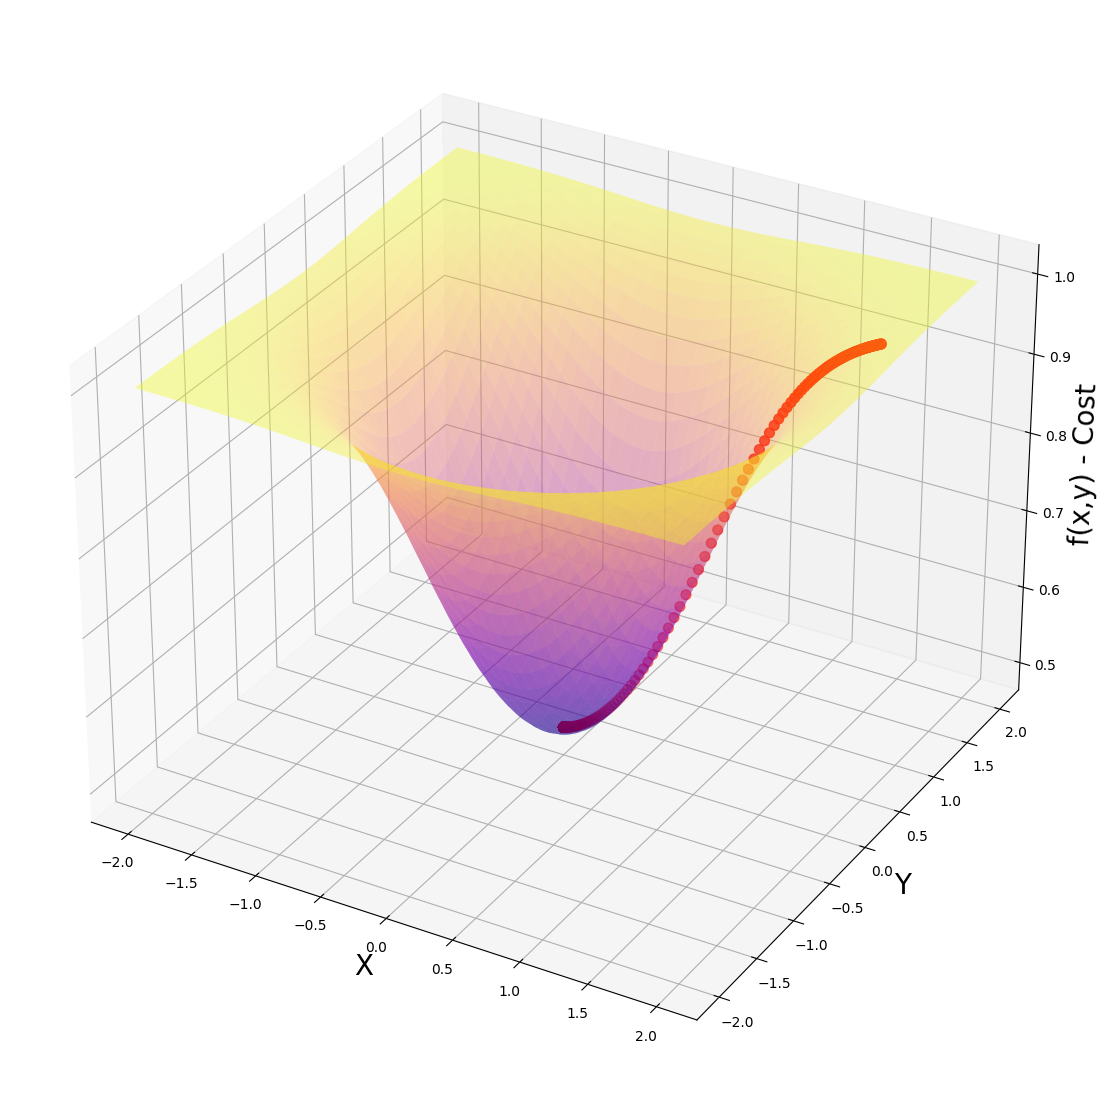

In [43]:
# Generating 3D plot

fig = plt.figure(figsize=[16,14])
# fig je kontajner object ktorý obsahuje všetky údaje o grafe
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) - Cost', fontsize=20)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')


ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma, alpha=0.4)
plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

Ekvivalentný zápis: 
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$

In [44]:
# Make sample data 

x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

print ('Shape of x_5 array is: ', x_5.shape)
print ('Shape of y_5 array is: ', y_5.shape)

Shape of x_5 array is:  (7, 1)
Shape of y_5 array is:  (7, 1)


In [45]:
# Quick linear regression

regr = lr()
regr.fit(x_5,y_5)

print ('Theta 0: ', regr.intercept_[0])
print ('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029554
Theta 1:  1.222726463783591


Text(0, 0.5, 'y values')

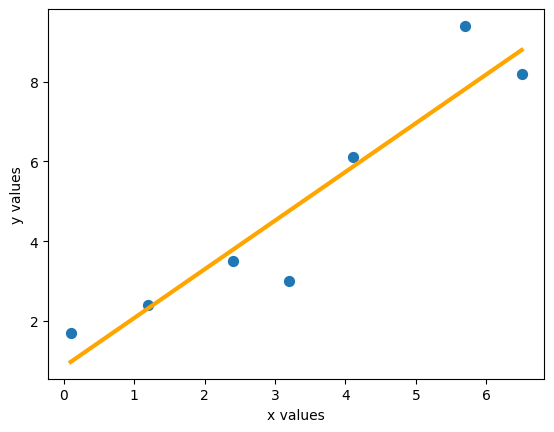

In [46]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)

plt.xlabel('x values')
plt.ylabel('y values')

In [47]:
# y_hat = theta0 + theta1*x

y_hat = 0.8475351486029554 + 1.222726463783591*x_5

print('Est. values y_hat are: \n', y_hat)
print('In comparison, the actual values are \n', y_5)

Est. values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [48]:
# Challenge: Write a Python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat) 
# function and print MSE for the y_hat calculated above.

In [49]:
def mse(y,y_hat):
    # MSE = 1/n*sum_{i=1-n}( y - y_hat)^2
    sum = 0
    # 1. option
    # sum((y[n]-y_hat[n])**2)
    # (1/y.size)*sum((y[n]-y_hat[n])**2)
    
    # 2. option
    # np.average((y-y_hat)**2, axis=0)
    
    for n in range(len(y)):
        sum = sum + (y[n]-y_hat[n])**2
    return sum/len(y)

# msel is funkction mean_squared_error zo sklearn

In [50]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regresion using manual calc is : ', msel(y_5, y_hat))
print('MSE regresion is : ', msel(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regresion using manual calc is :  0.9479655759794575
MSE regresion is :  0.9479655759794575


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [51]:
nr_thetas = 200
th_0 = np.linspace(-1, 3, nr_thetas)
th_1 = np.linspace(-1, 3, nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested loops

In [52]:
# Vytvorime si prazdne pole mse
plot_cost = np.zeros((nr_thetas,nr_thetas))


In [53]:
# Nested loops practice
for i in range(3):
    for j in range (3):
        print(f'value of i is {i} and value of j is {j}')

value of i is 0 and value of j is 0
value of i is 0 and value of j is 1
value of i is 0 and value of j is 2
value of i is 1 and value of j is 0
value of i is 1 and value of j is 1
value of i is 1 and value of j is 2
value of i is 2 and value of j is 0
value of i is 2 and value of j is 1
value of i is 2 and value of j is 2


In [54]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(f'value of plot_t0 is {plot_t0[j][i]}')
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        #print (f'mse pre {i}{j} je: ', mse(y_5, y_hat))
        plot_cost[i][j] = mse(y_5, y_hat)[0]             # preto index 0, lebo mse vráti 1 rozmerné pole

print('mse values for all thetas are: \n', plot_cost)
        
print('Shape of plot_t0 ', plot_t0.shape)
print('Shape of plot_t1 ', plot_t1.shape)
print('Shape of plot_cost ', plot_cost.shape)


mse values for all thetas are: 
 [[108.51285714 108.14283763 107.77362617 ...  51.2194266   51.00859498
   50.79857143]
 [106.88158925 106.51424787 106.14771456 ...  50.11575289  49.90759941
   49.700254  ]
 [105.262904   104.89824077 104.5343856  ...  49.02466182  48.81918649
   48.61451922]
 ...
 [ 30.0738157   30.23139037  30.38977309 ...  76.71643873  77.03320129
   77.35077191]
 [ 30.92133081  31.08158362  31.24264449 ...  78.09154801  78.41098872
   78.73123749]
 [ 31.78142857  31.94435952  32.10809853 ...  79.47923995  79.8013588
   80.12428571]]
Shape of plot_t0  (200, 200)
Shape of plot_t1  (200, 200)
Shape of plot_cost  (200, 200)


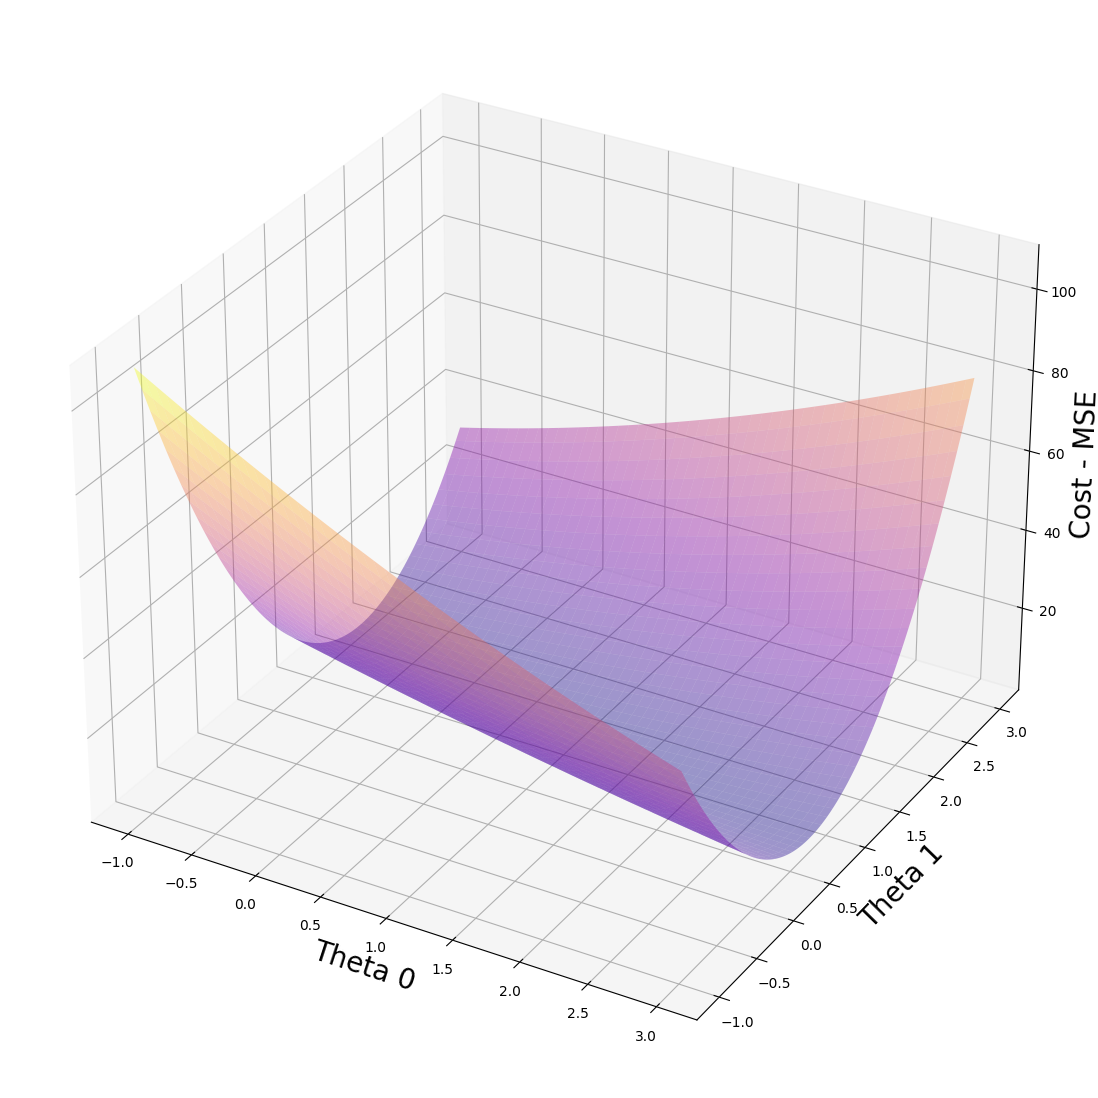

In [55]:
# Plotting MSE

fig = plt.figure(figsize=[16,14])

# fig je kontajner object ktorý obsahuje všetky údaje o grafe
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# ax.scatter(values_array[:, 0], values_array[:, 1], 
           # f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.plasma, alpha=0.4)
plt.show()

In [56]:
print('Min value of plot_cost', plot_cost.min())

ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)

print('Min value occurs at (i,j) ', ij_min)
print('Min MSE for theta 0 at plot_t0[111][91] is ', plot_t0[111][91])
print('Min MSE for theta 1 at plot_t1[111][91] is ', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min value occurs at (i,j)  (111, 91)
Min MSE for theta 0 at plot_t0[111][91] is  0.829145728643216
Min MSE for theta 1 at plot_t1[111][91] is  1.2311557788944723


## Partial derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n}\sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n}\sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## Lets create functions for MSE & Gradient Descent

In [57]:
# x values, y values and array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x,y,thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivatives of MSE by theta1 and 2
    theta0_slope = (-2/n)*sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n)*sum((y - thetas[0] - thetas[1]*x)*x)
    
    # return np.array([theta0_slope[0], [theta1_slope[0]])
    # return np.append(ARR=theta0_slope, VALUES=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [63]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# Starting values
# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)


for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0 : ', thetas[0])
print('Min occurs at Theta 1 : ', thetas[1])
print('MSE is : ', mse(y_5, thetas[0]+thetas[1]*x_5))

Thetas:  [2.9 2.9]
Min occurs at Theta 0 :  0.8532230461743415
Min occurs at Theta 1 :  1.2214935332607393
MSE is :  [0.94797511]


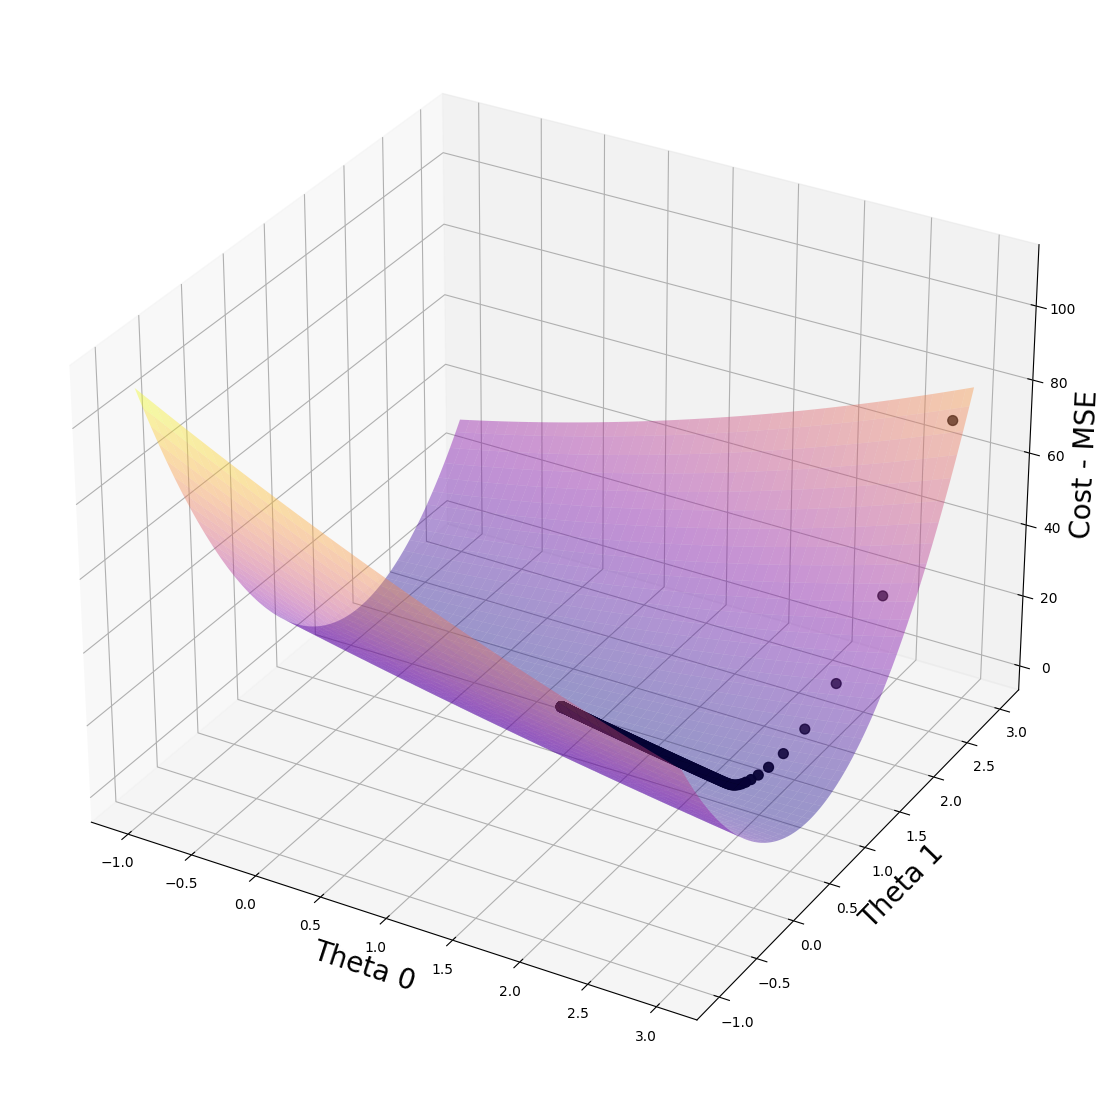

In [59]:
# Plotting MSE

fig = plt.figure(figsize=[16,14])

# fig je kontajner object ktorý obsahuje všetky údaje o grafe
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], 
           mse_vals, s=50, color='black')

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.plasma, alpha=0.4)
plt.show()